In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

customer_data = pd.read_csv("Telco_Churn.csv")
customer_data.head(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [47]:
customer_data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [48]:
print("No. of customers: " + str(len(customer_data.index)))

No. of customers: 7043


In [49]:
customer_data.drop(["Count", "Country", "State", "Latitude", "Longitude", "Churn Reason", "CustomerID", "Lat Long"], axis=1, inplace=True)

In [50]:
customer_data.columns

Index(['City', 'Zip Code', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV'],
      dtype='object')

<AxesSubplot:xlabel='Phone Service', ylabel='count'>

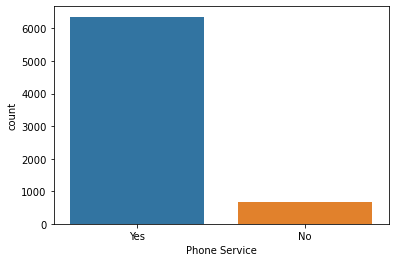

In [51]:
sns.countplot(x="Phone Service", data=customer_data)

<AxesSubplot:xlabel='Phone Service', ylabel='count'>

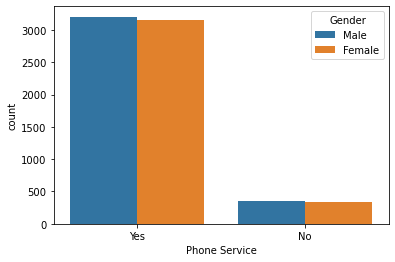

In [52]:
sns.countplot(x="Phone Service", hue="Gender", data=customer_data)

In [53]:
customer_data["Multiple Lines"].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [54]:
customer_data['Multiple Lines']=np.where(customer_data['Multiple Lines'] =='No phone service', 'No', customer_data['Multiple Lines'])

In [55]:
customer_data["Online Security"].unique()


array(['Yes', 'No', 'No internet service'], dtype=object)

In [56]:
customer_data.replace(to_replace="No internet service", value="No", inplace=True)

In [57]:
customer_data.head(15)

,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,Los Angeles,90003,Male,No,No,No,2,Yes,No,DSL,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,Los Angeles,90005,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,Los Angeles,90006,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372
3,Los Angeles,90010,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,Los Angeles,90015,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340
5,Los Angeles,90020,Female,No,Yes,No,10,Yes,No,DSL,...,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925
6,Los Angeles,90022,Male,Yes,No,No,1,No,No,DSL,...,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433
7,Los Angeles,90024,Male,No,No,No,1,Yes,No,No,...,No,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832
8,Los Angeles,90028,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789
9,Los Angeles,90029,Male,No,Yes,No,1,No,No,DSL,...,No,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915


In [58]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure Months      7043 non-null   int64  
 7   Phone Service      7043 non-null   object 
 8   Multiple Lines     7043 non-null   object 
 9   Internet Service   7043 non-null   object 
 10  Online Security    7043 non-null   object 
 11  Online Backup      7043 non-null   object 
 12  Device Protection  7043 non-null   object 
 13  Tech Support       7043 non-null   object 
 14  Streaming TV       7043 non-null   object 
 15  Streaming Movies   7043 non-null   object 
 16  Contract           7043 

In [59]:
customer_data.isnull()

,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
customer_data.isnull().sum()

City                 0
Zip Code             0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

In [61]:
customer_data.head(5)

,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,Los Angeles,90003,Male,No,No,No,2,Yes,No,DSL,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,Los Angeles,90005,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,Los Angeles,90006,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372
3,Los Angeles,90010,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,Los Angeles,90015,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340


In [62]:
customer_data.replace(to_replace="Yes", value=1, inplace=True)

In [63]:
customer_data.replace(to_replace="No", value=0, inplace=True)

In [64]:
customer_data.head(4)

,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,Los Angeles,90003,Male,0,0,0,2,1,0,DSL,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,86,3239
1,Los Angeles,90005,Female,0,0,1,2,1,0,Fiber optic,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,67,2701
2,Los Angeles,90006,Female,0,0,1,8,1,1,Fiber optic,...,1,Month-to-month,1,Electronic check,99.65,820.5,1,1,86,5372
3,Los Angeles,90010,Female,0,1,1,28,1,1,Fiber optic,...,1,Month-to-month,1,Electronic check,104.80,3046.05,1,1,84,5003


In [65]:
from sklearn.preprocessing import LabelEncoder

Lab = LabelEncoder()

customer_data['City'] = Lab.fit_transform(customer_data['City'])

In [66]:
Lab.classes_

array(['Acampo', 'Acton', 'Adelanto', ..., 'Yucaipa', 'Yucca Valley',
       'Zenia'], dtype=object)

In [67]:
customer_data.head(4)

,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,562,90003,Male,0,0,0,2,1,0,DSL,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,86,3239
1,562,90005,Female,0,0,1,2,1,0,Fiber optic,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,67,2701
2,562,90006,Female,0,0,1,8,1,1,Fiber optic,...,1,Month-to-month,1,Electronic check,99.65,820.5,1,1,86,5372
3,562,90010,Female,0,1,1,28,1,1,Fiber optic,...,1,Month-to-month,1,Electronic check,104.80,3046.05,1,1,84,5003


In [68]:
customer_data.replace(to_replace="Male", value=1, inplace=True)

In [69]:
customer_data.replace(to_replace="Female", value=0, inplace=True)

In [70]:
Lab_contract = LabelEncoder()
customer_data['Contract'] = Lab_contract.fit_transform(customer_data['Contract'])

In [71]:
Lab_payment = LabelEncoder()
customer_data['Payment Method'] = Lab_payment.fit_transform(customer_data['Payment Method'])

In [72]:
customer_data['Internet Service']=np.where(customer_data['Internet Service'] ==0, 'No', customer_data['Internet Service'])

In [73]:
Lab_internet = LabelEncoder()
customer_data['Internet Service'] = Lab_internet.fit_transform(customer_data['Internet Service'])

In [74]:
customer_data.head(4)

,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,562,90003,1,0,0,0,2,1,0,0,...,0,0,1,3,53.85,108.15,1,1,86,3239
1,562,90005,0,0,0,1,2,1,0,1,...,0,0,1,2,70.70,151.65,1,1,67,2701
2,562,90006,0,0,0,1,8,1,1,1,...,1,0,1,2,99.65,820.5,1,1,86,5372
3,562,90010,0,0,1,1,28,1,1,1,...,1,0,1,2,104.80,3046.05,1,1,84,5003


In [75]:
customer_data.drop(["Churn Label", "Churn Score", "Zip Code"], axis=1, inplace=True)

In [76]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   int32  
 1   Gender             7043 non-null   int64  
 2   Senior Citizen     7043 non-null   int64  
 3   Partner            7043 non-null   int64  
 4   Dependents         7043 non-null   int64  
 5   Tenure Months      7043 non-null   int64  
 6   Phone Service      7043 non-null   int64  
 7   Multiple Lines     7043 non-null   int64  
 8   Internet Service   7043 non-null   int32  
 9   Online Security    7043 non-null   int64  
 10  Online Backup      7043 non-null   int64  
 11  Device Protection  7043 non-null   int64  
 12  Tech Support       7043 non-null   int64  
 13  Streaming TV       7043 non-null   int64  
 14  Streaming Movies   7043 non-null   int64  
 15  Contract           7043 non-null   int32  
 16  Paperless Billing  7043 

In [77]:
type(customer_data["Total Charges"][0])

str

In [78]:
customer_data[customer_data["Total Charges"] == " "]

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
2234,865,0,0,1,0,0,0,0,0,1,...,1,1,0,2,1,0,52.55,,0,2578
2438,450,1,0,0,0,0,1,0,2,0,...,0,0,0,2,0,3,20.25,,0,5504
2568,888,0,0,1,0,0,1,0,0,1,...,0,1,1,2,0,3,80.85,,0,2048
2667,238,1,0,1,1,0,1,1,2,0,...,0,0,0,2,0,3,25.75,,0,4950
2856,820,0,0,1,0,0,0,0,0,1,...,1,1,0,2,0,1,56.05,,0,4740
4331,562,1,0,1,1,0,1,0,2,0,...,0,0,0,2,0,3,19.85,,0,2019
4687,982,1,0,1,1,0,1,1,2,0,...,0,0,0,2,0,3,25.35,,0,2299
5104,71,0,0,1,1,0,1,0,2,0,...,0,0,0,2,0,3,20.00,,0,3763
5719,501,1,0,1,1,0,1,0,2,0,...,0,0,0,1,1,3,19.70,,0,4890
6772,66,0,0,1,1,0,1,1,0,0,...,1,1,0,2,0,3,73.35,,0,2342


In [79]:
customer_data = customer_data[customer_data["Total Charges"] != " "]

In [80]:
X = customer_data.drop("Churn Value", axis=1)
y = customer_data["Churn Value"]

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [83]:
logmodel = LogisticRegression()

In [84]:
logmodel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
predictions = logmodel.predict(X_test)

In [86]:
from sklearn.metrics import classification_report

In [87]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.86      0.89      0.87      1573\n           1       0.63      0.57      0.60       537\n\n    accuracy                           0.81      2110\n   macro avg       0.75      0.73      0.74      2110\nweighted avg       0.80      0.81      0.80      2110\n'

In [88]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)

conf_matrix

array([[1396,  177],
       [ 230,  307]], dtype=int64)

In [89]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.8071090047393364

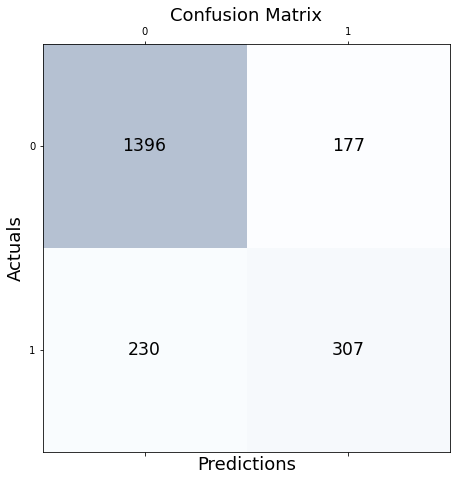

In [90]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()